In [12]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [13]:
from fastai.structured import *
from fastai.column_data import *
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'feature/'

In [14]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [15]:
df=pd.read_pickle('merged_1m.pkl')

In [16]:
df.head(20)

,atom_name,residue_name_x,feature_x,feature_y,feature_z,chain_id_y,x_coord,y_coord,z_coord,b_factor_y,element_symbol_y
0,CA,MET,37.390,40.466,11.665,A,37.390,40.466,11.665,0.0,C
1,N,MET,38.474,41.461,11.588,A,38.763,40.932,11.492,0.0,N
2,CB,MET,36.996,40.456,13.115,A,36.924,40.679,13.110,0.0,C
3,CG,MET,38.291,41.233,13.247,A,35.532,40.128,13.427,0.0,C
4,SD,MET,39.088,41.395,11.599,A,35.422,38.321,13.451,0.0,S
5,CE,MET,37.884,41.042,10.266,A,33.815,38.072,14.207,0.0,C
6,C,MET,36.331,40.746,10.550,A,36.434,41.158,10.694,0.0,C
7,O,MET,36.190,39.987,9.571,A,36.174,40.649,9.601,0.0,O
8,CA,SER,34.813,42.979,10.397,A,34.813,42.979,10.397,0.0,C
9,N,SER,35.916,42.034,10.615,A,35.930,42.325,11.090,0.0,N


In [17]:
df.columns

Index(['atom_name', 'residue_name_x', 'feature_x', 'feature_y', 'feature_z',
       'chain_id_y', 'x_coord', 'y_coord', 'z_coord', 'b_factor_y',
       'element_symbol_y'],
      dtype='object')

In [19]:
cat_vars = ['atom_name', 'residue_name_x', 'chain_id_y',
       'element_symbol_y']

In [20]:
contin_vars = ['x_coord', 'y_coord', 'z_coord','feature_x', 'feature_y', 'feature_z']

In [21]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()

In [22]:
for v in contin_vars:
    df[v] = df[v].fillna(0).astype('float32')

In [23]:
df.columns

Index(['atom_name', 'residue_name_x', 'feature_x', 'feature_y', 'feature_z',
       'chain_id_y', 'x_coord', 'y_coord', 'z_coord', 'b_factor_y',
       'element_symbol_y'],
      dtype='object')

In [24]:
y=df.drop(['atom_name', 'residue_name_x', 'chain_id_y','b_factor_y','element_symbol_y', 'feature_x', 'feature_y', 'feature_z'],axis=1)
y.head()

,x_coord,y_coord,z_coord
0,37.389999,40.466000,11.665
1,38.763000,40.931999,11.492
2,36.924000,40.679001,13.110
3,35.532001,40.127998,13.427
4,35.422001,38.320999,13.451


In [25]:
y=y.values

In [26]:
train_cats(df)

In [27]:
df.head()

,atom_name,residue_name_x,feature_x,feature_y,feature_z,chain_id_y,x_coord,y_coord,z_coord,b_factor_y,element_symbol_y
0,CA,MET,37.389999,40.466000,11.665,A,37.389999,40.466000,11.665,0.0,C
1,N,MET,38.473999,41.460999,11.588,A,38.763000,40.931999,11.492,0.0,N
2,CB,MET,36.995998,40.456001,13.115,A,36.924000,40.679001,13.110,0.0,C
3,CG,MET,38.291000,41.233002,13.247,A,35.532001,40.127998,13.427,0.0,C
4,SD,MET,39.088001,41.395000,11.599,A,35.422001,38.320999,13.451,0.0,S


In [28]:
df=df.drop(['x_coord','y_coord', 'z_coord'],axis=1)
df.head(10)

,atom_name,residue_name_x,feature_x,feature_y,feature_z,chain_id_y,b_factor_y,element_symbol_y
0,CA,MET,37.389999,40.466000,11.665,A,0.0,C
1,N,MET,38.473999,41.460999,11.588,A,0.0,N
2,CB,MET,36.995998,40.456001,13.115,A,0.0,C
3,CG,MET,38.291000,41.233002,13.247,A,0.0,C
4,SD,MET,39.088001,41.395000,11.599,A,0.0,S
5,CE,MET,37.883999,41.042000,10.266,A,0.0,C
6,C,MET,36.331001,40.745998,10.550,A,0.0,C
7,O,MET,36.189999,39.987000,9.571,A,0.0,O
8,CA,SER,34.813000,42.979000,10.397,A,0.0,C
9,N,SER,35.916000,42.034000,10.615,A,0.0,N


In [29]:
df1, d, nas, mapper = proc_df(df, 'b_factor_y', do_scale=True)

In [30]:
train_ratio = 0.9
train_size = int(len(df1) * train_ratio); train_size
val_idx = list(range(train_size, len(df1)))

In [31]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, y.astype(np.float32), cat_flds=cat_vars, bs=128)

In [32]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]

In [33]:
cat_sz

[('atom_name', 38),
 ('residue_name_x', 21),
 ('chain_id_y', 2),
 ('element_symbol_y', 5)]

In [34]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [35]:
emb_szs

[(38, 19), (21, 11), (2, 1), (5, 3)]

In [37]:
m = md.get_learner(emb_szs, 3,0.08, 3, [1000,500,500,500,500,500,500], [0.3,0.3])

In [38]:
m.crit = F.mse_loss

In [39]:
# e = m.model
# e.eval()

In [40]:
m.lr_find()

 57%|█████▋    | 4967/8678 [00:26<00:19, 188.44it/s, loss=91.9]   

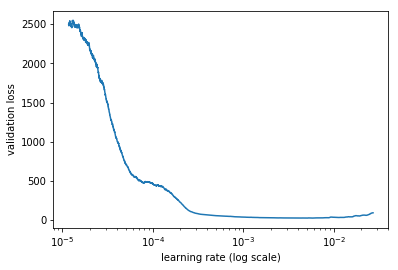

In [41]:
m.sched.plot(100)

In [42]:
lr = 7e-4
wd = 0

In [43]:
m.fit(lr, 1, wds=wd, cycle_len=40, use_clr=(8,3))

epoch      trn_loss   val_loss                                    
    0      23.455204  3.526237  
    1      17.766223  2.957681                                 
    2      16.48361   2.889606                                 
    3      17.115388  3.826996                                 
    4      16.294975  2.925324                                 
    5      15.932347  3.096341                                 
    6      15.798093  2.839298                                 
    7      16.343241  2.944253                                 
    8      15.832714  3.044501                                 
    9      15.805845  2.922197                                 
    10     16.127235  2.844241                                 
    11     16.192173  3.542206                                 
    12     16.381223  3.765264                                 
    13     15.909499  3.058886                                 
    14     15.696132  3.411673                                 
    

[array([2.55962])]

In [44]:
m.save('m_feature')

In [45]:
e = m.model
e.eval()

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(38, 19)
    (1): Embedding(21, 11)
    (2): Embedding(2, 1)
    (3): Embedding(5, 3)
  )
  (lins): ModuleList(
    (0): Linear(in_features=37, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): Linear(in_features=500, out_features=500, bias=True)
    (4): Linear(in_features=500, out_features=500, bias=True)
    (5): Linear(in_features=500, out_features=500, bias=True)
    (6): Linear(in_features=500, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
    (3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
    (4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1,

In [28]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

/home/bahram/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



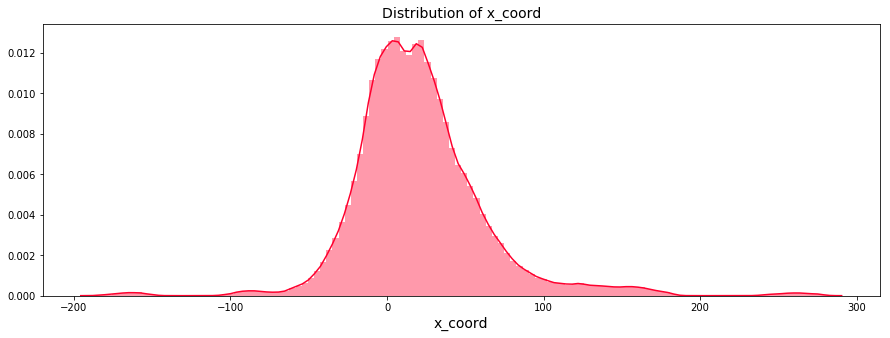

In [29]:
## 1. Deal Probability Distribution
def generate_histogram_plot(df, col, title):
    trace = go.Histogram(x = df[col]) 
    layout = go.Layout(title=title, legend=dict(orientation="h"), height=400)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)


# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(df["x_coord"].values, bins=120, color="#ff002e")
plt.xlabel('x_coord', fontsize=14);
plt.title("Distribution of x_coord", fontsize=14);
plt.show();

In [30]:
cols = df.columns
cols

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca'],
      dtype='object')

In [31]:
def _generate_bar_plot_hor(df, col, title, color, w=None, h=None, lm=0, limit=100):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(y=cnt_srs.index[::-1], x=cnt_srs.values[::-1], orientation = 'h',
        marker=dict(color=color))

    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)




In [56]:
_generate_bar_plot_hor(df, cols[2], "Distribution of residues", '#66f992', 600, 500, 200, limit=30)

In [51]:
from plotly import tools

In [53]:
init_notebook_mode(connected=True)

In [62]:
trace1 = _generate_bar_plot_ver(df, cols[2], "Param 1 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(df, cols[9], "Param 2 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace3 = _generate_bar_plot_ver(df, cols[4], "Param 3 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['residues Values','element symbol'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);
# fig.append_trace(trace3, 1, 3);

fig['layout'].update(height=400,title='Top Values', showlegend=False);
iplot(fig); 

In [58]:
def _create_pie_chart(df, col):
    tm = df[col].value_counts()
    labels = list(tm.index)
    values = list(tm.values)
    trace = go.Pie(labels=labels, values=values, marker=dict(colors=['#f9c968', '#75e575', '#d693b3']))
    return trace
trace1 = _create_pie_chart(df, 'residue_name')
layout = go.Layout(title='Distribution of residues', width=600, height=400, margin=dict(l=100))
data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

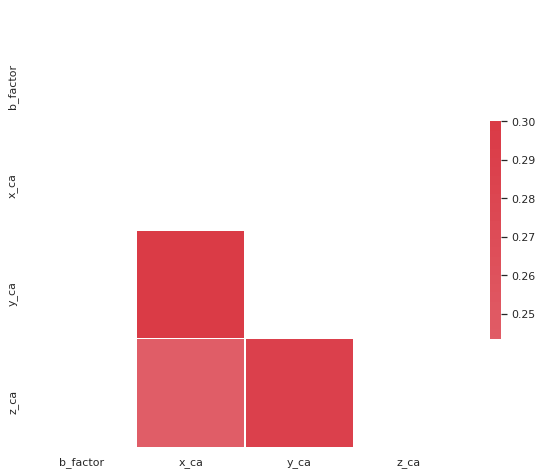

In [60]:
corr =df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [46]:
x,y = m.predict_with_targs()

In [47]:
y.shape

(123407, 1, 3)

In [48]:
y=y.reshape(123407,3)

In [49]:
error = y-x

In [50]:
error

array([[ 0.30798,  0.04313,  0.33871],
       [ 0.64635, -0.19143, -0.48728],
       [ 0.65603,  0.59746, -0.50293],
       [-1.06471, -1.77314, -0.20647],
       [ 0.68792,  1.8651 , -1.11209],
       [ 1.02374,  1.24341, -0.17656],
       [ 0.17626,  0.14827,  0.40594],
       [ 0.36362,  0.68279,  0.35646],
       [ 0.18826,  0.14248, -0.08515],
       [-0.70394, -0.21831,  0.66747],
       [ 0.19995,  1.22409, -0.29191],
       [ 0.36218,  0.30731, -2.8115 ],
       [ 0.73039, -1.10464, -2.07915],
       [ 1.20822, -2.57168, -1.80883],
       [ 0.70606, -0.0594 , -2.3788 ],
       [ 0.0419 , -0.09395,  0.20232],
       [ 0.21497, -0.20946,  0.43375],
       [ 0.35527,  0.09656, -0.07401],
       [ 0.4923 , -0.06145, -0.13227],
       [ 0.47586, -0.0654 ,  0.09586],
       ...,
       [ 0.39359, -1.24972,  0.06448],
       [-1.13609, -3.37736,  0.25511],
       [-0.59186, -4.33561,  0.17388],
       [-2.04348, -6.7347 ,  0.3258 ],
       [-3.13684, -6.8942 , -1.29903],
       [ 0.53

In [51]:
abs_error = abs(error)

In [52]:
abs_error.mean()

1.0725303

In [175]:
x

array([[ 0.05252, 55.39627, 12.9027 ],
       [-1.65923, 53.78876, 16.26591],
       [-1.65371, 53.85696, 16.22474],
       [-1.528  , 53.89463, 16.37074],
       [-1.47129, 53.95329, 16.43474],
       [-2.05965, 53.75644, 16.05489],
       [-1.87269, 53.71476, 16.19342],
       [-1.96162, 53.69075, 16.21448],
       [-2.22459, 54.09946, 16.88316],
       [-4.22157, 55.60457, 16.66744],
       [-4.19673, 55.49461, 16.65507],
       [-4.13814, 55.58257, 16.72759],
       [-4.22689, 55.52577, 16.80235],
       [-4.62861, 55.6029 , 16.80062],
       [-4.49895, 55.56804, 16.7992 ],
       [-5.02212, 55.17744, 13.42948],
       [-5.05959, 55.18295, 13.43347],
       [-4.93824, 55.27827, 13.59846],
       [-4.87242, 55.26395, 13.63608],
       [-5.25499, 55.56884, 12.94852],
       ...,
       [19.73734, 46.29922, 11.42879],
       [19.55425, 45.76807,  8.24464],
       [19.41352, 45.7323 ,  8.21234],
       [19.6583 , 46.0004 ,  8.1125 ],
       [19.67873, 46.31625,  7.99462],
       [18.96